In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 
import seaborn as sns
import numpy as np
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure
import datetime as dt

In [2]:
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
df = pd.read_csv('data_covid19_global_cases_&_deaths.csv')
with pd.ExcelWriter('dataset3.xlsx') as writer:
    df.to_excel(writer,sheet_name='sheet 1')

In [4]:
df.head()

,OBJECTID,ISO_2_CODE,ISO_3_CODE,ADM0_NAME,date_epicrv,NewCase,CumCase,NewDeath,CumDeath,Short_Name_ZH,Short_Name_FR,Short_Name_ES,Short_Name_RU,Short_Name_AR
0,1,AF,AFG,Afghanistan,2020-02-24T00:00:00.000Z,1,1,0,0,阿富汗,Afghanistan,Afganistán,Афганистан,أفغانستان
1,2,AF,AFG,Afghanistan,2020-02-25T00:00:00.000Z,0,1,0,0,阿富汗,Afghanistan,Afganistán,Афганистан,أفغانستان
2,3,AF,AFG,Afghanistan,2020-02-26T00:00:00.000Z,0,1,0,0,阿富汗,Afghanistan,Afganistán,Афганистан,أفغانستان
3,4,AF,AFG,Afghanistan,2020-02-27T00:00:00.000Z,0,1,0,0,阿富汗,Afghanistan,Afganistán,Афганистан,أفغانستان
4,5,AF,AFG,Afghanistan,2020-02-28T00:00:00.000Z,0,1,0,0,阿富汗,Afghanistan,Afganistán,Афганистан,أفغانستان


In [5]:
df.shape

(19350, 14)

In [6]:
df.dtypes

OBJECTID          int64
ISO_2_CODE       object
ISO_3_CODE       object
ADM0_NAME        object
date_epicrv      object
NewCase           int64
CumCase           int64
NewDeath          int64
CumDeath          int64
Short_Name_ZH    object
Short_Name_FR    object
Short_Name_ES    object
Short_Name_RU    object
Short_Name_AR    object
dtype: object

In [7]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
numeric_cols

array(['OBJECTID', 'NewCase', 'CumCase', 'NewDeath', 'CumDeath'],
      dtype=object)

In [8]:
df_nonnumeric = df.select_dtypes(exclude=[np.number])
nonnumeric_cols = df_nonnumeric.columns.values
nonnumeric_cols

array(['ISO_2_CODE', 'ISO_3_CODE', 'ADM0_NAME', 'date_epicrv',
       'Short_Name_ZH', 'Short_Name_FR', 'Short_Name_ES', 'Short_Name_RU',
       'Short_Name_AR'], dtype=object)

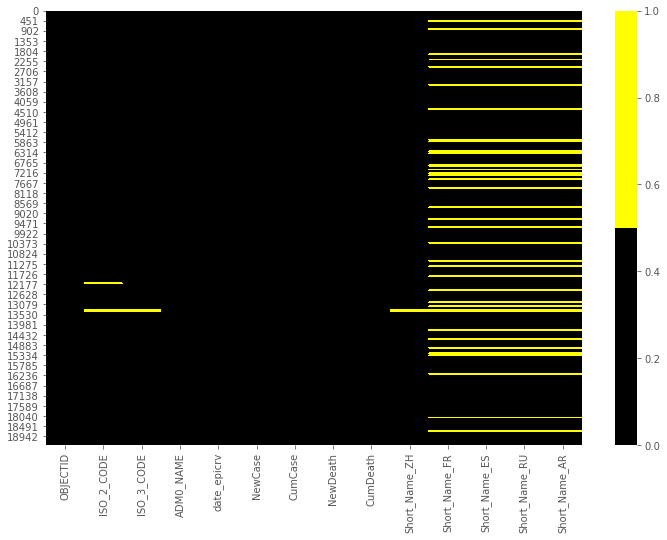

In [9]:
colors = ['black','yellow']
cols = df.columns[:14]
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colors))

In [10]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))

OBJECTID - 0.0%
ISO_2_CODE - 1.0%
ISO_3_CODE - 1.0%
ADM0_NAME - 0.0%
date_epicrv - 0.0%
NewCase - 0.0%
CumCase - 0.0%
NewDeath - 0.0%
CumDeath - 0.0%
Short_Name_ZH - 1.0%
Short_Name_FR - 15.0%
Short_Name_ES - 15.0%
Short_Name_RU - 15.0%
Short_Name_AR - 15.0%


In [11]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('created missing indicator for {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        

created missing indicator for ISO_2_CODE
created missing indicator for ISO_3_CODE
created missing indicator for Short_Name_ZH
created missing indicator for Short_Name_FR
created missing indicator for Short_Name_ES
created missing indicator for Short_Name_RU
created missing indicator for Short_Name_AR


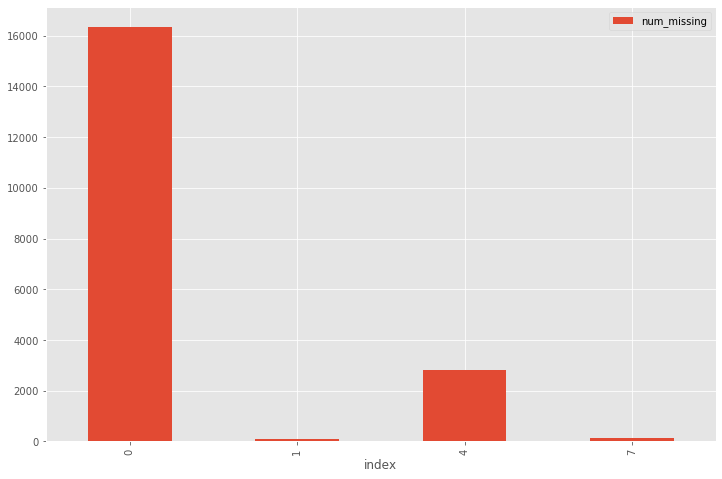

In [12]:
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [13]:
to_drop=['Short_Name_ZH','Short_Name_FR','Short_Name_ES','Short_Name_RU','Short_Name_AR']
df.drop(to_drop,axis=1,inplace = True)

In [14]:
df1 = df.drop('OBJECTID', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df.shape)

(19350, 17)
(19350, 17)


In [15]:
df['date_epicrv_dt'] = pd.to_datetime(df['date_epicrv'], format='%Y-%m-%d')
df['year'] = df['date_epicrv_dt'].dt.year
df['month'] = df['date_epicrv_dt'].dt.month
df['weekday'] = df['date_epicrv_dt'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

2020    19350
Name: year, dtype: int64

5    6683
4    6355
3    4601
2     895
6     648
1     168
Name: month, dtype: int64


In [16]:
df.columns

Index(['OBJECTID', 'ISO_2_CODE', 'ISO_3_CODE', 'ADM0_NAME', 'date_epicrv',
       'NewCase', 'CumCase', 'NewDeath', 'CumDeath', 'ISO_2_CODE_ismissing',
       'ISO_3_CODE_ismissing', 'Short_Name_ZH_ismissing',
       'Short_Name_FR_ismissing', 'Short_Name_ES_ismissing',
       'Short_Name_RU_ismissing', 'Short_Name_AR_ismissing', 'num_missing',
       'date_epicrv_dt', 'year', 'month', 'weekday'],
      dtype='object')

In [17]:
to_drop=['ISO_2_CODE_ismissing',
       'ISO_3_CODE_ismissing', 'Short_Name_ZH_ismissing',
       'Short_Name_FR_ismissing', 'Short_Name_ES_ismissing',
       'Short_Name_RU_ismissing', 'Short_Name_AR_ismissing', 'num_missing']
df.drop(to_drop,axis=1,inplace=True)

In [18]:
df.head()

,OBJECTID,ISO_2_CODE,ISO_3_CODE,ADM0_NAME,date_epicrv,NewCase,CumCase,NewDeath,CumDeath,date_epicrv_dt,year,month,weekday
0,1,AF,AFG,Afghanistan,2020-02-24T00:00:00.000Z,1,1,0,0,2020-02-24 00:00:00+00:00,2020,2,0
1,2,AF,AFG,Afghanistan,2020-02-25T00:00:00.000Z,0,1,0,0,2020-02-25 00:00:00+00:00,2020,2,1
2,3,AF,AFG,Afghanistan,2020-02-26T00:00:00.000Z,0,1,0,0,2020-02-26 00:00:00+00:00,2020,2,2
3,4,AF,AFG,Afghanistan,2020-02-27T00:00:00.000Z,0,1,0,0,2020-02-27 00:00:00+00:00,2020,2,3
4,5,AF,AFG,Afghanistan,2020-02-28T00:00:00.000Z,0,1,0,0,2020-02-28 00:00:00+00:00,2020,2,4


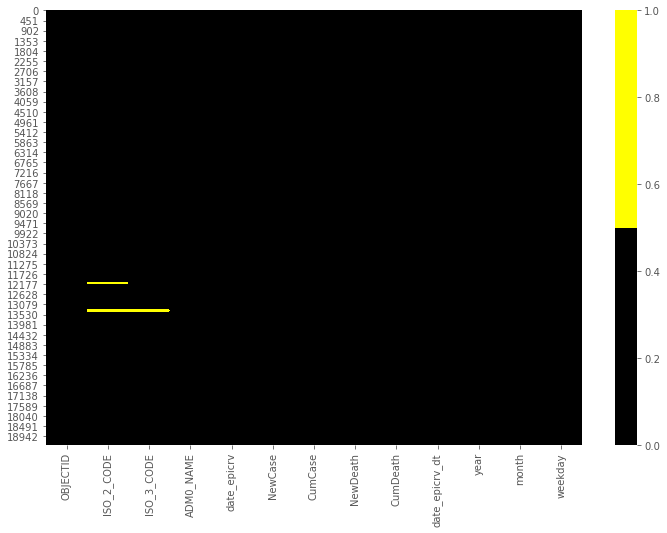

In [19]:
colors = ['black','yellow']
cols = df.columns[:]
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colors))

In [20]:

df.dropna(inplace=True)

In [21]:
df.shape

(19148, 13)

In [22]:
df.isnull().sum()

OBJECTID          0
ISO_2_CODE        0
ISO_3_CODE        0
ADM0_NAME         0
date_epicrv       0
NewCase           0
CumCase           0
NewDeath          0
CumDeath          0
date_epicrv_dt    0
year              0
month             0
weekday           0
dtype: int64